In [1]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U sentence-transformers

  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Obtaining dependency information for transformers<5.0.0,>=4.6.0 from https://files.pythonhosted.org/packages/1a/06/3817f9bb923437ead9a794f0ac0d03b8b5e0478ab112db4c413dd37c09da/transformers-4.33.2-py3-none-any.whl.metadata
  Using cached transformers-4.33.2-py3-none-any.whl.metadata (119 kB)
  Using cached torchvision-0.15.2-cp311-cp311-win_amd64.whl (1.2 MB)
  Obtaining dependency information for huggingface-hub>=0.4.0 from https://files.pythonhosted.org/packages/50/9d/5eac2733606df7d164b951b14cd76b056e530af96c881aaec89383bdbe45/huggingface_hub-0.17.1-py3-none-any.whl.metadata
  Using cached huggingface_hub-0.17.1-py3-none-any.whl.metadata (13 kB)
Using cached huggingface_hub-0.17.1-py3-none-any.whl (294 kB)
Using cached transformers-4.33.2-py3-none-any.whl (7.6 MB)
  Attempting uninstall: transformers
    Found existing installation: transformers 2.1.1
    Uninstalling transformers-2.1.1:
      Successfully uninstalled tran

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\DELL\\anaconda3\\Lib\\site-packages\\transformers-4.33.2.dist-info\\INSTALLERzii3z36o.tmp'



In [23]:
import pandas as pd
import numpy as np

file_name = r"testing.xlsx"
dtest = pd.read_excel(file_name)

name = r"training.xlsx"
dtrain = pd.read_excel(name)

In [5]:
pip install -U sentence-transformers

  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Obtaining dependency information for transformers<5.0.0,>=4.6.0 from https://files.pythonhosted.org/packages/1a/06/3817f9bb923437ead9a794f0ac0d03b8b5e0478ab112db4c413dd37c09da/transformers-4.33.2-py3-none-any.whl.metadata
  Using cached transformers-4.33.2-py3-none-any.whl.metadata (119 kB)
  Using cached torchvision-0.15.2-cp311-cp311-win_amd64.whl (1.2 MB)
Using cached transformers-4.33.2-py3-none-any.whl (7.6 MB)
  Attempting uninstall: transformers
    Found existing installation: transformers 2.1.1
    Uninstalling transformers-2.1.1:
      Successfully uninstalled transformers-2.1.1
Note: you may need to restart the kernel to use updated packages.


In [29]:
from sentence_transformers import SentenceTransformer
model=SentenceTransformer('sentence-transformers/sentence-t5-base')
dtest['EmbeddingsLM']=dtest['Equation'].apply(lambda x:model.encode(x))
t5_test=pd.DataFrame(dtest['EmbeddingsLM'].tolist(),index=dtest.index).add_prefix('embed_')

In [30]:
from sentence_transformers import SentenceTransformer
model=SentenceTransformer('sentence-transformers/sentence-t5-base')
dtrain['EmbeddingsLM']=dtrain['input'].apply(lambda x:model.encode(str(x)))
t5_train=pd.DataFrame(dtrain['EmbeddingsLM'].tolist(),index=dtrain.index).add_prefix('embed_')

In [44]:
from sklearn.metrics import pairwise_distances
import numpy as np

# Assuming you have a 'label' column named 'output' in your dtrain DataFrame
# You want to calculate intraclass spread and interclass distances between class 0 and class 1
class_0_embeddings = t5_train[dtrain['output'] == 0]  # Extract embeddings for Class 0
class_2_embeddings = t5_train[dtrain['output'] == 2]  # Extract embeddings for Class 1

# Calculate class centroids
class_0_centroid = np.mean(class_0_embeddings, axis=0)
class_2_centroid = np.mean(class_2_embeddings, axis=0)

# Calculate intra-class spread
intra_class_spread_0 = np.mean(pairwise_distances(class_0_embeddings, [class_0_centroid]))
intra_class_spread_2 = np.mean(pairwise_distances(class_2_embeddings, [class_2_centroid]))

# Calculate inter-class distance
inter_class_distance = np.linalg.norm(class_0_centroid - class_2_centroid)

print(f"Intra-Class Spread for Class 0: {intra_class_spread_0}")
print(f"Intra-Class Spread for Class 1: {intra_class_spread_2}")
print(f"Inter-Class Distance: {inter_class_distance}")

Intra-Class Spread for Class 0: 0.4098898768424988
Intra-Class Spread for Class 1: 0.4001496732234955
Inter-Class Distance: 0.18720611929893494


In [45]:
# Calculate class centroids
class_0_centroid = np.mean(class_0_embeddings, axis=0)
class_2_centroid = np.mean(class_2_embeddings, axis=0)

print("Centroid for Class 0:")
print(class_0_centroid)

print("Centroid for Class 2:")
print(class_2_centroid)

Centroid for Class 0:
embed_0     -0.044635
embed_1     -0.017735
embed_2      0.020121
embed_3      0.027892
embed_4     -0.009931
               ...   
embed_763    0.041760
embed_764    0.010263
embed_765   -0.010697
embed_766   -0.024372
embed_767   -0.015144
Length: 768, dtype: float32
Centroid for Class 2:
embed_0     -0.031106
embed_1     -0.023400
embed_2      0.029723
embed_3      0.025665
embed_4     -0.012012
               ...   
embed_763    0.045582
embed_764    0.013111
embed_765    0.005711
embed_766   -0.015524
embed_767   -0.020441
Length: 768, dtype: float32


In [46]:
# Calculate the standard deviation for each class
std_dev_class_0 = np.std(class_0_embeddings, axis=0)
std_dev_class_2 = np.std(class_2_embeddings, axis=0)

print("Standard Deviation for Class 0:")
print(std_dev_class_0)

print("Standard Deviation for Class 2:")
print(std_dev_class_2)

Standard Deviation for Class 0:
embed_0      0.015957
embed_1      0.016389
embed_2      0.011970
embed_3      0.011559
embed_4      0.016255
               ...   
embed_763    0.015457
embed_764    0.010691
embed_765    0.019062
embed_766    0.012560
embed_767    0.016986
Length: 768, dtype: float32
Standard Deviation for Class 2:
embed_0      0.014434
embed_1      0.014191
embed_2      0.016214
embed_3      0.015403
embed_4      0.015401
               ...   
embed_763    0.015673
embed_764    0.013112
embed_765    0.014319
embed_766    0.018266
embed_767    0.016980
Length: 768, dtype: float32


In [47]:
# Calculate the mean vectors (centroids) for each class
class_0_centroid = np.mean(class_0_embeddings, axis=0)
class_2_centroid = np.mean(class_2_embeddings, axis=0)

# Calculate the Euclidean distance between the mean vectors
distance_between_classes = np.linalg.norm(class_0_centroid - class_2_centroid)

print("Distance between Class 0 and Class 2 mean vectors:")
print(distance_between_classes)

Distance between Class 0 and Class 2 mean vectors:
0.18720612


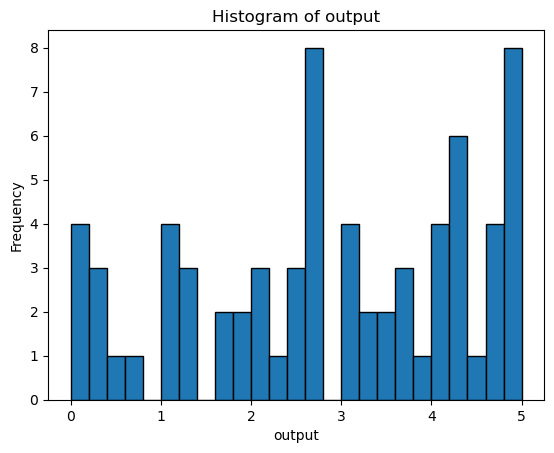

Mean of output: 2.8616844465058753
Variance of output: 2.402811788864269


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset file or URL
file_name = r"testing.xlsx"
df = pd.read_excel(file_name)

# Choose the feature to analyze, assuming it's named 'output'
selected_feature = 'output'

# Plot a histogram
num_bins = 25  # Adjust the number of bins (buckets) as needed
plt.hist(df[selected_feature], bins=num_bins, edgecolor='k')
plt.xlabel(selected_feature)
plt.ylabel('Frequency')
plt.title(f'Histogram of {selected_feature}')
plt.show()

# Calculate the mean and variance
feature_mean = df[selected_feature].mean()
feature_variance = df[selected_feature].var()

print(f"Mean of {selected_feature}: {feature_mean}")
print(f"Variance of {selected_feature}: {feature_variance}")


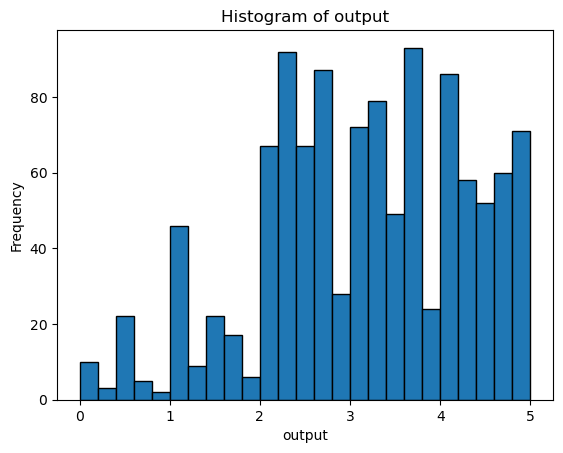

Mean of output: 3.13614526555964
Variance of output: 1.3751565931940488


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset file or URL
file_name = r"training.xlsx"
df = pd.read_excel(name)

# Choose the feature to analyze, assuming it's named 'output'
selected_feature = 'output'

# Plot a histogram
num_bins = 25  # Adjust the number of bins (buckets) as needed
plt.hist(df[selected_feature], bins=num_bins, edgecolor='k')
plt.xlabel(selected_feature)
plt.ylabel('Frequency')
plt.title(f'Histogram of {selected_feature}')
plt.show()

# Calculate the mean and variance
feature_mean = df[selected_feature].mean()
feature_variance = df[selected_feature].var()

print(f"Mean of {selected_feature}: {feature_mean}")
print(f"Variance of {selected_feature}: {feature_variance}")

C:\Users\DELL\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\DELL\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


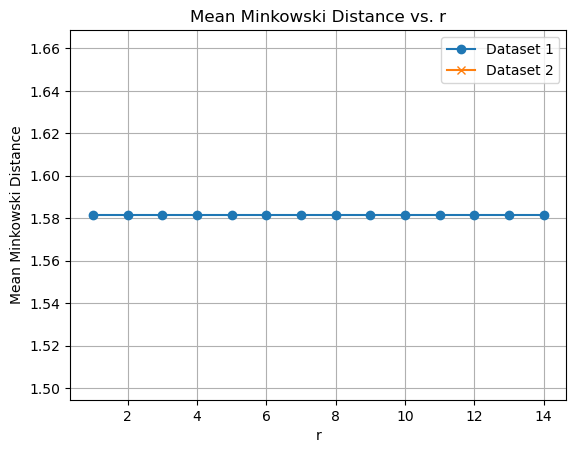

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from the first Excel file (replace 'file1.xlsx' with the actual path)
file_name = r"testing.xlsx"
df1 = pd.read_excel(file_name)

# Load data from the second Excel file (replace 'file2.xlsx' with the actual path)
file_name = r"training.xlsx"
df2 = pd.read_excel(name)

# Choose the features to use as output from each dataset
# Replace 'OutputFeature1' and 'OutputFeature2' with the actual column names
feature1 = df1['output'].values
feature2 = df2['output'].values

# Define a range of 'r' values from 1 to 10
r_values = range(1, 15)

# Calculate the Minkowski distances for each 'r' value and store them in lists
distances1 = []
distances2 = []

for r in r_values:
    minkowski_distances1 = []
    minkowski_distances2 = []
    
    for i in range(len(feature1)):
        for j in range(len(feature2)):
            distance = np.abs(feature1[i] - feature2[j])**r
            minkowski_distances1.append(distance**(1/r))
    
    mean_distance1 = np.mean(minkowski_distances1)
    mean_distance2 = np.mean(minkowski_distances2)
    
    distances1.append(mean_distance1)
    distances2.append(mean_distance2)

# Create a plot to observe the nature of the distance graph for both datasets
plt.plot(r_values, distances1, label='Dataset 1', marker='o', linestyle='-')
plt.plot(r_values, distances2, label='Dataset 2', marker='x', linestyle='-')
plt.xlabel('r')
plt.ylabel('Mean Minkowski Distance')
plt.title('Mean Minkowski Distance vs. r')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)

# Create a kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier to your training data
neigh.fit(X_train, y_train)

NameError: name 'X' is not defined

In [55]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have already split your data into X_train and y_train
# If not, please refer to the previous code for splitting the data.

# Create a k-NN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier to your training data
neigh.fit(X_train, y_train)

NameError: name 'X_train' is not defined